# COGS 108 - Final Project 

# Overview

In this project, I compared the health inspection scores of restaurants versus food stands in North Carolina. I used a t-test to find out if there was a significant difference between the scores. I found a significant difference in health scores between restaurants and food stands. Food stands had significantly higher scores, although there were some limitations within the data.

# Name & GitHub

- Name: Valerie Warner
- GitHub Username: valeriewarner

# Research Question

What is the relationship between restaurants versus food stands in North Carolina realtive to health violations?

## Background and Prior Work

The North Carolina Restaurant and Lodging Association reports there are 19,504 eating and drinking locations in the state as of 2018 (1). The state has heavy health code regulations for food carts as well, and acquiring a food cart license takes time for inspection, classes, etc. It may also be important to note there are approximately 60 health departments in the state itself (2).

Food stand food may be seen as more of a health danger due to the nature of them serving food outdoors. A study done on street food safety in Ghana found "that although vendors and consumers demonstrated basic knowledge of food safety, the criteria did not emphasize basic hygiene practices such as hand washing, cleaning of utensils, washing of raw vegetables, and quality of ingredients" (3). The vendors were more focused on appearance of the food and themselves, as well as pricing and accessibility of food. It seems as if the venders were neglecting some important aspects of food safety, such as hygeine and cleanliness (3). The study makes a call to action, wanting vendors to focus more on reaching hygenic standards. Although the study was done in Ghana, it may apply in North Carolina as well.

The FDA says the five most common health code violations in restaurants are pests, cross-contamination, sanitization, hand washing, and temperature control (4). Additionally, a health department in MI clarifies that "critical violations are more likely than non-critical violations to lead to contamination of food or to result in illness if not corrected. Each violation listed in an inspection report clearly states whether or not the violation is critical" (5).


References (include links):
- 1) https://restaurant.org/downloads/pdfs/state-statistics/northcarolina.pdf
- 2) http://www.doghousecarts.com/business/food-cart-license/north-carolina-department-of-health-food-cart-license
- 3) https://link.springer.com/article/10.1007/s11524-008-9318-3
- 4) https://blog.smartsense.co/fda-5-food-safety-citations
- 5) https://www.washtenaw.org/1562/Violation-Types#:~:text=Critical%20violations%20are%20more%20likely,not%20the%20violation%20is%20critical.

# Hypothesis


**I hypothesize that there is a relationship between restaurants versus food stands and health violations in North Carolina.** The data previously discussed shows a possible difference in health violations found at food stands as compared to restaurants. I predict that food stands may have **worse** health scores overall because of the outdoor setting and less developed facilities and hygeine practices. I think restaurants may have **higher** scores overall because they have an indoor setting and indoor bathroom facilities, which may increase hygeine practices. 

# Dataset(s)

- Dataset Name: restaurants.csv 
- Number of observations: 3324

The restaurants dataset contains information about about many of the eateries in North Carolina, including name, ID, address, city, and facility type (ie. restaurant, food stand, cafeteria, etc).

I plan to combine the information about facility type in this dataset with the inspections data in order to compare the scores of health inspections.


- Dataset Name: inspections.csv 
- Number of observations: 18466

The inspections data set gives information on the health inspections that have taken place in NC eateries, by ID number. There are multiples of some eateries, they are time stamped, and they each give the score, number of non critical and critical violations, name of inspector, and many more details about the inspection process.

I plan to combine the inspections dataset with the restaurants dataset to look at the score differences.

# Setup

In [445]:
#From COGS108_A3
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()
sns.set_context('talk')

#from dataviz lecture
sns.set(style="white")

#from a5
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

pd.options.display.max_rows = 10
pd.options.display.max_columns = 10


pd.set_option('precision', 2)

#datasets using

df_rest = pd.read_csv('restaurants.csv') 
df_ins = pd.read_csv('inspections.csv')

# Data Cleaning

For data cleaning, the two data sets were a bit messy. The restaurant dataset had two identification columns as well (hsisid & X.objectid)

The steps I took in cleaning the data were as follows:

- 1. Inspected data sets for overlap and to examine contents in each
- 2. Dropped initial columns from both data sets that were not necessary or violated the privacy o the restaurants, including  names
- 3. Because I am analyzing restaurants and food stands only, I removed all other facility types from the restaurant data set
- 4. Merged the restaurant data set with inspections data set based on the 'hsisid' identification number
- 5. Checked for null values
- 6. Drop 'hsisid' identifier for privacy

The finalized, cleaned data set has no missing values, and no way to identify the restaurant or food stand. It only includes the facility type (Restaurant or Food Stand), health inspection score, number of critical violations, and number of non-critical violations. The final, clean dataset contains 15238 observations (some restaurants underwent mutliple inspections; I will be including all the data).

In [446]:
# drop some unnecessary columns 
df_rest = df_rest.loc[:, ['hsisid', 'facilitytype']]
df_ins = df_ins.loc[:, ['hsisid', 'score', 'num_critical','num_non_critical']]

In [447]:
# filter by restaurant and food stand
df_rest1 = df_rest[df_rest['facilitytype'] == 'Restaurant']
df_rest2 = df_rest[df_rest['facilitytype'] == 'Food Stand']
df_rest = df_rest1.merge(df_rest2, how = 'outer')

In [448]:
# merge on hsisid
df = df_rest.merge(df_ins, on='hsisid', how = 'inner')

#check for null values
df.isnull().any()

#remove identification
df = df.drop(['hsisid'], axis=1)

In [449]:
df.head()

,facilitytype,score,num_critical,num_non_critical
0,Restaurant,88.0,9,7
1,Restaurant,99.0,1,6
2,Restaurant,99.5,2,4
3,Restaurant,98.0,3,2
4,Restaurant,98.5,2,4


# Data Analysis & Results

I would like to see if there is a significant difference in health scores between Restaurants and Food Stands.

I will first look at the distribution of scores as a whole, then I will look at the health scores separated on the basis of Restaurants or Food Stands.

Text(0.5, 0, 'Score')

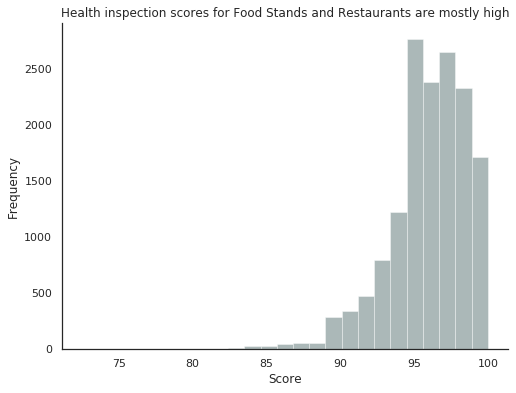

In [450]:
plt.rcParams['figure.figsize']=(8,6)
ax = sns.distplot(df['score'], kde = False, bins = 25, color="darkslategray")
sns.despine()

ax.set_title('Health inspection scores for Food Stands and Restaurants are mostly high')
ax.set_ylabel('Frequency')
ax.set_xlabel('Score')


The overall distribution of health scores among both Food Stands and Restaurants is skewed left, with most scores between 90 and 100. The minimum of the scores is 72.5, and the mean is 95.91. According to my calculation, anything below 89.25 is considered an outlier.

Text(0.5, 0, 'Number of Critical Violations')

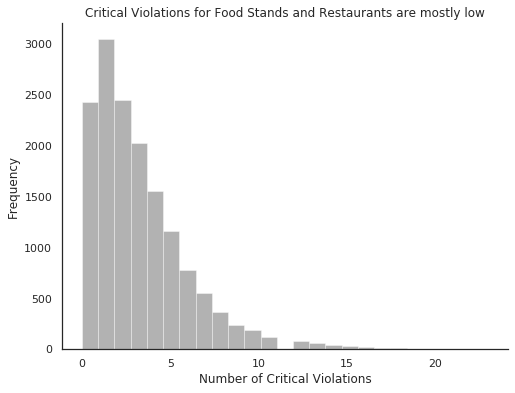

In [451]:
plt.rcParams['figure.figsize']=(8,6)
ax = sns.distplot(df['num_critical'], kde = False, bins = 25, color="#3F3F3F")
sns.despine()

ax.set_title('Critical Violations for Food Stands and Restaurants are mostly low')
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of Critical Violations')

It appears critical violations for Food Stands and Restaurants is right skewed. This would make sense because scores are mostly high, so critical violations would not occur as often. The mean is approximately 3, and the maximum is 23 violations. Anything above 8.5 violations is considered an outlier.

Text(0.5, 0, 'Type of Eatery')

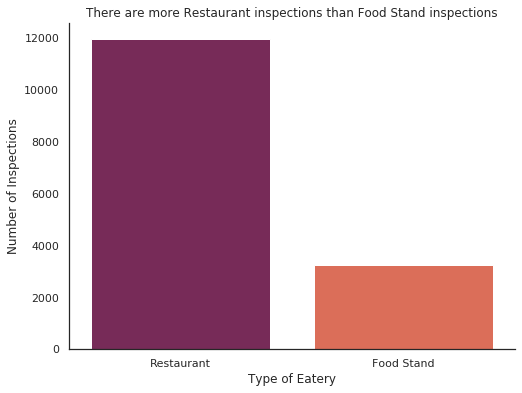

In [441]:
plt.rcParams['figure.figsize']=(8,6)
ax= sns.countplot(x='facilitytype', data=df, palette='rocket')
sns.despine()

ax.set_title('There are more Restaurant inspections than Food Stand inspections')
ax.set_ylabel('Number of Inspections')
ax.set_xlabel('Type of Eatery')

As we see from the plot above, there is more data in the dataset that comes from Restaurant health inspections, as opposed to Food Stand health inspections. Restaurant inspections make up more than half of the data. This may affect the results of the analysis.

Now let's look at the Health Inspection scores broken down by facility type (restaurant/food stand).

Text(0.5, 0, 'Type of Eatery')

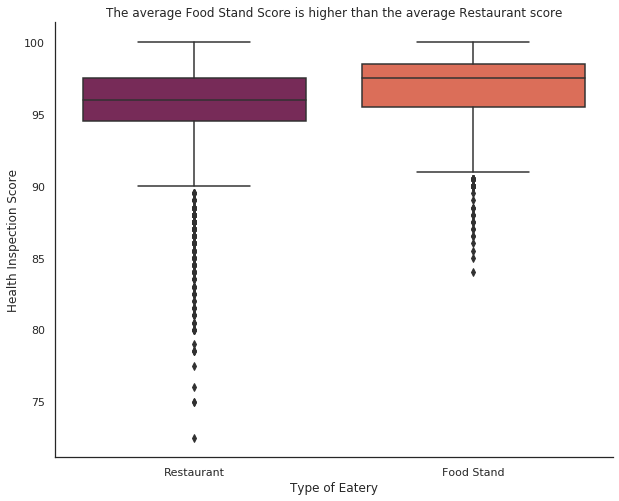

In [453]:
plt.rcParams['figure.figsize']=(10,8)
ax= sns.boxplot(x='facilitytype', y='score', data=df, palette='rocket')
sns.despine()

ax.set_title('The average Food Stand Score is higher than the average Restaurant score')
ax.set_ylabel('Health Inspection Score')
ax.set_xlabel('Type of Eatery')

It appears the average score for Food Stands is higher than the average score for Restaurants. The average for Restaurants appears to be around 95, while the average for Food Stands appears to be approximately 97. The boxplot also reveals an abundance of outliers present in both categories-- eateries that have unusually low scores. The overall distribution of scores, excluding the outliers, appears approximately the same for both categories.

Now let's get into analysis. We are going to use a t-test to see if there is a significant difference in the mean scores between Restaurants and Food Stands. A t-test is used because it allows us to compare the mean differences in score for two groups, which is perfect for the two groups we are comparing here (Restaurants & Food Stands).

In [454]:
# extracting scores for each facility type
s_rest= df[df['facilitytype']=='Restaurant']['score'].values
s_food = df[df['facilitytype']=='Food Stand']['score'].values

In [455]:
#average score for each facility type
avg_s_rest = s_rest.mean()
avg_s_food = s_food.mean()

print('The average score for Restaurants is \t{:f} points'.format(avg_s_rest))
print('The average score for Food Stands is \t{:f} points'.format(avg_s_food))

The average score for Restaurants is 	95.665582 points
The average score for Food Stands is 	96.828620 points


Because there is a difference in means, we will do a t-test to see if the difference is significant.

In [457]:
#t-test
stats.ttest_ind(s_rest, s_food)
pvalue= stats.ttest_ind(s_rest, s_food)[1]

#is p-value less than alpha (0.01)?
if pvalue < .01:
    print ('There is a significant difference!')
else:
    print ('No significant difference')

There is a significant difference!


Based on the results of the t-test, there is a significant difference between Restaurant health inspection scores and Food Stand inspection scores in North Carolina. Food Stand inspection scores are significantly higher than Restaurant health inspection scores, which means that Food Stands commit less health violations than Restaurants.

# Ethics & Privacy

The data is presumably open source because it was provided. Checks to make sure of this would need to be done if this was a published analysis.

Phone numbers, zipcodes, addresses, and names should typically be removed in analysis within the datasets. Because the data here is restaurant data and most of the information about a restaurant's address and contact information if known, it is more questionable whether that information needs to be removed. However, I have removed this information in order to protect the privacy of the restaurants. 

There may definitely be biases in the datasets used, in particular the inspections data. Because inspections are carried out by humans, there is chance for human error and human bias (ie. what an inspector thinks an eatery should get marked down for). If the data was entered by a human, there may definitely be errors there.

Because there are not an equal amount of food stands and restaurants to compare in this dataset, the results of the analysis may lack accuracy and therefore be unethical to publish. I would need additional data or a more equal amount of data. Additionally, food stands and restaurants may have different distributions of health inspection scores outside of North Carolina, so gathering data from other states may also improve accuracy.

It may not be ethical to compare food stands to restaurants. The data analysis, or the data sets in general could be used to tarnish the reputation of certain food stands or restaurants. Were this to be published with personal restaurant information, such as name or address, it may affect their business, which is not the intention of this data analysis at all.

In order to do my best to protect the privacy of the restaurants, I dropped all identifying information about the restaurants and food stands, even the hsisid identification number after I merged the two data sets. This way, I could carry out the analysis ethically without hurting anyone's personal life or business.

# Conclusion & Discussion

In this project, I wanted to explore the question: What is the relationship between restaurants versus food stands in North Carolina in relation to health violations? Using data of restaurants in North Carolina and their inspection scores, I examined the question. In my analysis, I explored the data as a whole, then separated the health score data by facility type- either restaurant or food stand. I performed a t-test on the two groups' health scores, and I found a significant difference between the two groups. In my hypothesis, I predicted there would be a difference, which was correct. However, I also predicted scores would be higher for restaurants rather than food stands, which was incorrect. From my analysis, I found the food stand health scores to be higher than the restaurant scores, showing that food stands commit fewer health violations than restaurants.

There were certainly limitations to my analysis. I was limited by eateries in North Carolina only, so an exploration of other parts of the US could change the results I found. Having more data could increase the validity of the analysis. Additionally, I could have gone further in my analysis of the data by performing a t-test on all the variables, including the critical and non-critical violations, to look at differences in the types of violations. Further, there were many outliers, especially in the restaurant health scores, which may have altered the results I found. If I were to perform the analysis again, I would remove them.

This data analysis could impact society in that it could inform food businesses, especially restaurants, on changes that need to be made, specifically in terms of health practices. 